# Hendling Missing Data

Sometimes we don't have some data points in our data sample but we need to handle this situation otherwise we can't analyze data properly.
<br>
There are some methods to handle these missing values:<br><br>
<b>1.Deleting: </b>Delete all the data corresponding to this data index in table<br>
<b>2.Ignoring: </b>Ignore these value but use other columns values if given<br>
<b>3.Filling: </b>Taking previous or next value to fill it<br>
<b>4.Replace: </b>Repalce with some static value<br>

Example data set
<pre class="prettyprint prettyprinted" style=""><span class="pln">                    TX       TX1yr
</span><span class="typ">Date</span><span class="pln">                              
</span><span class="lit">1975</span><span class="pun">-</span><span class="lit">01</span><span class="pun">-</span><span class="lit">31</span><span class="pln">    </span><span class="lit">0.000000</span><span class="pln">         </span><span class="kwd">0.000000</span><span class="pln">
</span><span class="lit">1975</span><span class="pun">-</span><span class="lit">02</span><span class="pun">-</span><span class="lit">28</span><span class="pln">    </span><span class="lit">1.291954</span><span class="pln">         </span><span class="kwd">1.284485</span><span class="pln">
</span><span class="lit">1975</span><span class="pun">-</span><span class="lit">03</span><span class="pun">-</span><span class="lit">31</span><span class="pln">    </span><span class="lit">3.348154</span><span class="pln">         </span><span class="kwd">NaN</span><span class="pln">
</span><span class="lit">1975</span><span class="pun">-</span><span class="lit">04</span><span class="pun">-</span><span class="lit">30</span><span class="pln">    </span><span class="lit">6.097700</span><span class="pln">         </span><span class="kwd">NaN</span><span class="pln">
</span><span class="lit">1975</span><span class="pun">-</span><span class="lit">05</span><span class="pun">-</span><span class="lit">31</span><span class="pln">    </span><span class="lit">6.887769</span><span class="pln">         </span><span class="kwd">NaN</span><span class="pln">
</span><span class="lit">1975</span><span class="pun">-</span><span class="lit">06</span><span class="pun">-</span><span class="lit">30</span><span class="pln">    </span><span class="lit">5.566434</span><span class="pln">         </span><span class="kwd">5.578521</span><span class="pln">
</span><span class="lit">1975</span><span class="pun">-</span><span class="lit">07</span><span class="pun">-</span><span class="lit">31</span><span class="pln">    </span><span class="lit">4.710613</span><span class="pln">         </span><span class="kwd">4.8542323</span><span class="pln">
</span><span class="lit">1975</span><span class="pun">-</span><span class="lit">08</span><span class="pun">-</span><span class="lit">31</span><span class="pln">    </span><span class="lit">4.612650</span><span class="pln">         </span><span class="kwd">NaN</span><span class="pln">

In [72]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import style 
style.use("fivethirtyeight")

In [73]:
HPI_data = pd.read_pickle('fiddy_states_data.pickle')
HPI_data['TX_YEAR']  = HPI_data['TX'].resample('A').mean()
HPI_data = HPI_data[['TX','TX_YEAR']]
print(HPI_data.head(13))

                   TX    TX_YEAR
Date                            
1975-01-31  32.582514        NaN
1975-02-28  32.956762        NaN
1975-03-31  33.592795        NaN
1975-04-30  34.460884        NaN
1975-05-31  34.658289        NaN
1975-06-30  34.159936        NaN
1975-07-31  33.855268        NaN
1975-08-31  33.842428        NaN
1975-09-30  33.938596        NaN
1975-10-31  34.060297        NaN
1975-11-30  34.288083        NaN
1975-12-31  34.499877  33.907977
1976-01-31  34.634899        NaN


# 1. dropna(axis=' ' ,how=' ', thresh=' ' , subset=' ', inplace=' ') 

<b>axis=' '</b>: (axis = 1) => operation will perform on column, (axis = 0) => opeation will perform on row, Default value is 0<br>
<b>how = ''</b>: (how='any') => remove all row/colums which have NaN, (how='all') => ramove all the row/columns which have all the value equal to NaN<br>
<b>thresh=X</b>: only those rows will exist in data with have atleat X numbes of Non-NaN valus 

In [50]:
##how='any' will drop all the rows which are having NaN value
HPI_data1 = HPI_data.dropna(how='any')    ##any is default of parameter of how
print(HPI_data1.head(5))
HPI_data1 = HPI_data.dropna(axis = 1,how='any')  #any column will remove which will have NaN value 
print(HPI_data1.head(5))
HPI_data1 = HPI_data.dropna(axis = 0, how='any')    ##any row will remove which will have NaN value 
print(HPI_data1.head(5))

                   TX    TX_YEAR
Date                            
1975-12-31  34.499877  33.907977
1976-12-31  37.245885  36.326228
1977-12-31  42.175132  39.944588
1978-12-31  48.754050  45.891938
1979-12-31  56.866162  53.261870
                   TX
Date                 
1975-01-31  32.582514
1975-02-28  32.956762
1975-03-31  33.592795
1975-04-30  34.460884
1975-05-31  34.658289
                   TX    TX_YEAR
Date                            
1975-12-31  34.499877  33.907977
1976-12-31  37.245885  36.326228
1977-12-31  42.175132  39.944588
1978-12-31  48.754050  45.891938
1979-12-31  56.866162  53.261870


In [51]:
##how='all' will drop all the rows which are having NaN all the NaN vales
HPI_data1 = HPI_data.dropna(how='all')    
print(HPI_data1.head(5))
HPI_data1 = HPI_data.dropna(axis = 1,how='all') 
print(HPI_data1.head(5))

                   TX  TX_YEAR
Date                          
1975-01-31  32.582514      NaN
1975-02-28  32.956762      NaN
1975-03-31  33.592795      NaN
1975-04-30  34.460884      NaN
1975-05-31  34.658289      NaN
                   TX  TX_YEAR
Date                          
1975-01-31  32.582514      NaN
1975-02-28  32.956762      NaN
1975-03-31  33.592795      NaN
1975-04-30  34.460884      NaN
1975-05-31  34.658289      NaN


In [52]:
##thresh=NUMBER will keep the rows which have atleat NUMBERs of Non-NaN value 
HPI_data1 = HPI_data.dropna(thresh=2)   ##will keep whicj have two Values in a row 
print(HPI_data1.head(5))
HPI_data1 = HPI_data.dropna(thresh=1)  #will keep value which have one value in row
print(HPI_data1.head(5))

                   TX    TX_YEAR
Date                            
1975-12-31  34.499877  33.907977
1976-12-31  37.245885  36.326228
1977-12-31  42.175132  39.944588
1978-12-31  48.754050  45.891938
1979-12-31  56.866162  53.261870
                   TX  TX_YEAR
Date                          
1975-01-31  32.582514      NaN
1975-02-28  32.956762      NaN
1975-03-31  33.592795      NaN
1975-04-30  34.460884      NaN
1975-05-31  34.658289      NaN


# 2 . fillna(value=' ',method=' ', limit=' ')
<h3>value=' '</h3> we can fill the value at NaN by some appropriate value<br>
<h3>method=' '</h3>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>ffill</b>: forward fill ie filling next NaN value with previous value<br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>backfill or bfill</b>: this is backword fill ie filling back NaN value with future values
<h3>limit=X</h3> number of NaN value that you want to fill, in  our case from all the data set first <b>X</b> values will fill and othe will remain same (ie. NaN)


                   TX    TX_YEAR
Date                            
1975-01-31  32.582514   1.000000
1975-02-28  32.956762   1.000000
1975-03-31  33.592795   1.000000
1975-04-30  34.460884   1.000000
1975-05-31  34.658289   1.000000
1975-06-30  34.159936   1.000000
1975-07-31  33.855268   1.000000
1975-08-31  33.842428   1.000000
1975-09-30  33.938596   1.000000
1975-10-31  34.060297   1.000000
1975-11-30  34.288083   1.000000
1975-12-31  34.499877  33.907977
1976-01-31  34.634899   1.000000


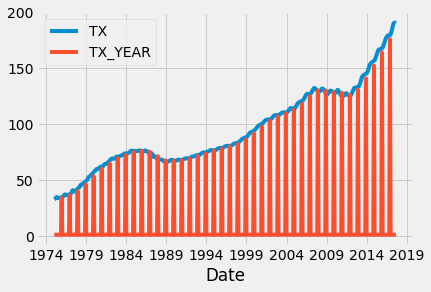

In [71]:
fig = plt.figure()
ax1 = plt.subplot2grid((1,1),(0,0))
HPI_data1 = HPI_data.fillna(value=1)
HPI_data1[['TX','TX_YEAR']].plot(ax = ax1)
print(HPI_data1.head(13))
plt.legend()
plt.show()

### method = 'ffill'

                   TX    TX_YEAR
Date                            
1975-01-31  32.582514        NaN
1975-02-28  32.956762        NaN
1975-03-31  33.592795        NaN
1975-04-30  34.460884        NaN
1975-05-31  34.658289        NaN
1975-06-30  34.159936        NaN
1975-07-31  33.855268        NaN
1975-08-31  33.842428        NaN
1975-09-30  33.938596        NaN
1975-10-31  34.060297        NaN
1975-11-30  34.288083        NaN
1975-12-31  34.499877  33.907977
1976-01-31  34.634899  33.907977


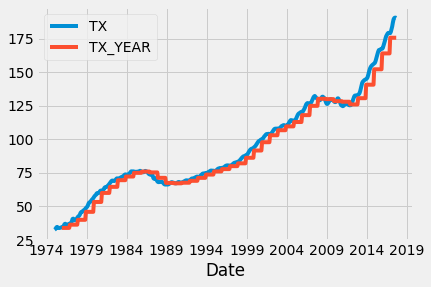

In [70]:
fig = plt.figure()
ax1 = plt.subplot2grid((1,1),(0,0))
HPI_data1 = HPI_data.fillna(method='ffill')
HPI_data1[['TX','TX_YEAR']].plot(ax = ax1)
print(HPI_data1.head(13))
plt.legend()
plt.show()

### method = 'backfill' or 'bfill'
more accurate 

                   TX    TX_YEAR
Date                            
1975-01-31  32.582514  33.907977
1975-02-28  32.956762  33.907977
1975-03-31  33.592795  33.907977
1975-04-30  34.460884  33.907977
1975-05-31  34.658289  33.907977
1975-06-30  34.159936  33.907977
1975-07-31  33.855268  33.907977
1975-08-31  33.842428  33.907977
1975-09-30  33.938596  33.907977
1975-10-31  34.060297  33.907977
1975-11-30  34.288083  33.907977
1975-12-31  34.499877  33.907977
1976-01-31  34.634899  36.326228


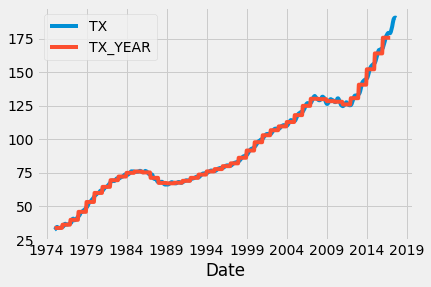

In [69]:
fig = plt.figure()
ax1 = plt.subplot2grid((1,1),(0,0))
HPI_data1 = HPI_data.fillna(method='backfill')
HPI_data1[['TX','TX_YEAR']].plot(ax = ax1)
print(HPI_data1.head(13))
plt.legend()
plt.show()